# E-commerce Analysis

A. [Amazon dataset](#section-one)

B. [Walmart dataset ](#section-two)

### Problem statement




### Objectives of Project

It is the aim to analyse consumer behaviour in order to assist a business to build an effective and targeted marketing strategy. To do this we will build predictive models on data sets compiled from e-Commerce giants, Amazon & Walmart. 

Amazon dataset:

• ***Build a Sentiment Analysis model*** to predict the effect on sales in relation to customer reviews.


•***Analyse the conversion rates*** in this dataset also with a view to building a model to increase these.


Examine customer sensitivity to price by ***building a linear regression model on the Walmart*** dataset.


<a id="section-A"></a>
# Amazon dataset

### Table of Contents:
1. [Introduction](#section-one)

2. [Preprocessing and Cleaning dataset](#section-two)

3. [Story Generation and Visualization from reviews](#section-three)

4. [Text reviews](#section-four)

5. [Extracting Features from Cleaned reviews](#section-five)

6. [Model Building: Sentiment Analysis](#section-six)

<a id="section-one"></a>



# Introduction

The retail industry has taken a 180 degree turn with the rise in online shopping. In 2019, retail e-commerce sales worldwide amounted to 3.53 trillion US dollars and e-retail revenues are projected to grow to 6.54 trillion US dollars in 2022.
It was predicted that in 2020 the global e-commerce market size is to exceed 4 trillion dollars, and one in every four online consumers purchases from stores once a week according to Invespcro (2020) report.

It has been shown that consumers are likely to research product review in contemplating purchase, and businesses are likely to research reviews on competitor prices.

### Sentiment Analysis

Sentiment Analysis refers to the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information. 
Understanding people’s emotions is essential for businesses since customers are able to express their thoughts and feelings more openly than ever before.It is quite hard for a human to go through each single line and identify the emotion being the user experience. With machine learning models nowadays we can automatically analyzing customer feedback, from product reviews and survey responses to social media conversations for example, which allows to tailor products and services to meet customer needs.


### Import Libraries

In [1]:
#Basic and Visualization libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pylab
plt.style.use('fivethirtyeight')
from matplotlib import rcParams
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px


#NLTK libraries
import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from subprocess import check_output
from nltk import word_tokenize
import nltk.classify.util
from textblob import TextBlob

# Machine Learning libraries
import sklearn 
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import normalize
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing 


# Standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

#Other Libraries
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
from scipy import interp
from itertools import cycle


#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc


#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

### Building Functions

In [31]:
#CREATE SENTIMENT COLUMN
def define_sentiment(row):
    
    '''This function returns sentiment value based on the average review rating from the user'''
    if row['reviews.rating'] == 3.0:
        val = 'Neutral'
    elif row['reviews.rating'] < 3.0:
        val = 'Negative'
    elif row['reviews.rating'] > 3.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [32]:
def review_cleaning(x):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    x = str(x).lower()
    x = re.sub('\[.*?\]', '', x)
    x = re.sub('https?://\S+|www\.\S+', '', x)
    x = re.sub('<.*?>+', '', x)
    x = re.sub('[%s]' % re.escape(string.punctuation), '', x)
    x = re.sub('\n', '', x)
    x = re.sub('\w*\d\w*', '', x)
    return x

In [33]:
def removePunctuation(x):
    x = x.lower()
    x = re.sub(r'[^\x00-\x7f]',r' ',x)
    return re.sub('['+string.punctuation+']', ' ', x)

stops = set(stopwords.words('english'))
def removeStopwords(x):
    filtered_words = [word for word in x.split() if word not in stops]
    return ' '.join(filtered_words)
def removeAmzString(x):
    return re.sub(r'[0-9]', '', x)

In [34]:
def generate_ngrams(txt, n_gram=1):
    token = [token for token in txt.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(data, color):
    trace = go.Bar(y=data['word'].values[::-1], x=data['wordcount'].values[::-1],
        showlegend=False, orientation = 'h', marker=dict(color=color))
    return trace

In [35]:
def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix', cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    """
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print('Normalized confusion matrix')
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i in range (cm.shape[0]):
        for j in range (cm.shape[1]):
            plt.text(j, i, cm[i, j],
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'gray')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Importing Amazon dataset

In [36]:
pd.set_option('display.max.columns', None)
amazon_data = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')
amazon_data.head(3)

id             dateAdded           dateUpdated  \
0  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
1  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   
2  AVqVGZNvQMlgsOJE6eUY  2017-03-03T16:56:05Z  2018-10-25T16:36:31Z   

                                                name       asins   brand  \
0  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
1  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
2  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   

                                          categories primaryCategories  \
0  Computers,Electronics Features,Tablets,Electro...       Electronics   
1  Computers,Electronics Features,Tablets,Electro...       Electronics   
2  Computers,Electronics Features,Tablets,Electro...       Electronics   

                                           imageURLs  \
0  https://pisces.bbystatic.com/image2/BestBuy_US...   
1  https://pisces.bbystatic.com/image2/BestBuy_US...   
2  https://pisces.bbystatic.com/image2/BestBuy_US...   

                                                keys manufacturer  \
0  allnewkindleereaderblack6glarefreetouchscreend...       Amazon   
1  allnewkindleereaderblack6glarefreetouchscreend...       Amazon   
2  allnewkindleereaderblack6glarefreetouchscreend...       Amazon   

  manufacturerNumber              reviews.date reviews.dateAdded  \
0         B00ZV9PXP2  2017-09-03T00:00:00.000Z               NaN   
1         B00ZV9PXP2  2017-06-06T00:00:00.000Z               NaN   
2         B00ZV9PXP2  2018-04-20T00:00:00.000Z               NaN   

                                    reviews.dateSeen  reviews.doRecommend  \
0  2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...                False   
1  2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...                 True   
2                               2018-05-27T00:00:00Z                 True   

   reviews.id  reviews.numHelpful  reviews.rating  \
0         NaN                   0               3   
1         NaN                   0               5   
2         NaN                   0               4   

                                  reviews.sourceURLs  \
0  http://reviews.bestbuy.com/3545/5442403/review...   
1  http://reviews.bestbuy.com/3545/5442403/review...   
2  https://reviews.bestbuy.com/3545/5442403/revie...   

                                        reviews.text  \
0  I thought it would be as big as small paper bu...   
1  This kindle is light and easy to use especiall...   
2  Didnt know how much i'd use a kindle so went f...   

                                  reviews.title reviews.username  \
0                                     Too small           llyyue   
1  Great light reader. Easy to use at the beach           Charmi   
2                           Great for the price     johnnyjojojo   

                                          sourceURLs  
0  https://www.newegg.com/Product/Product.aspx%25...  
1  https://www.newegg.com/Product/Product.aspx%25...  
2  https://www.newegg.com/Product/Product.aspx%25...

In [37]:
amazon_data.shape

(5000, 24)

In [38]:
amazon_data['reviews.text'].unique

<bound method Series.unique of 0       I thought it would be as big as small paper bu...
1       This kindle is light and easy to use especiall...
2       Didnt know how much i'd use a kindle so went f...
3       I am 100 happy with my purchase. I caught it o...
4       Solid entry level Kindle. Great for kids. Gift...
                              ...                        
4995    This is a great tablet for the price. Amazon i...
4996    This tablet is the perfect size and so easy to...
4997    Purchased this for my son. Has room to upgrade...
4998    I had some thoughts about getting this for a 5...
4999    this is a steal, have 8 gb model as well.This ...
Name: reviews.text, Length: 5000, dtype: object>

### Dataset description

The file has:
* 



<a id="section-two"></a>
# Preprocessing and Cleaning dataset

### Handling Null Values


In [39]:
clean_data = amazon_data.copy()
#display how many nulls are in each column
px.bar(clean_data.isnull().sum()
       ,title='Nulls Per Column'
       ,color=clean_data.isnull().sum().index)

**From 5000 entries we got relevant missing data in: review.dateAdd and reviews.id.
Where the majority of features are missing values, which drive us to de decision to drop this columns as we do not see a way to replace this values.**

In [40]:
clean_df = clean_data.drop(['reviews.dateAdded', 'reviews.id'], axis=1)

In [41]:
#Convert the 'Date' column to datetime format
clean_df['dateAdded']= pd.to_datetime(clean_df['dateAdded'])

In [42]:
clean_df['dateUpdated']= pd.to_datetime(clean_df['dateUpdated'])

In [43]:
clean_df['reviews.date']= pd.to_datetime(clean_df['reviews.date'])

In [44]:
#clean_df['reviews.dateSeen']= pd.to_datetime(clean_df['reviews.dateSeen'])

In [45]:
clean_df['reviews.rating'] = clean_df['reviews.rating'].astype(str).astype(float)
clean_df['reviews.numHelpful'] = clean_df['reviews.numHelpful'].astype(str).astype(float)
clean_df.head(3)

id                 dateAdded               dateUpdated  \
0  AVqVGZNvQMlgsOJE6eUY 2017-03-03 16:56:05+00:00 2018-10-25 16:36:31+00:00   
1  AVqVGZNvQMlgsOJE6eUY 2017-03-03 16:56:05+00:00 2018-10-25 16:36:31+00:00   
2  AVqVGZNvQMlgsOJE6eUY 2017-03-03 16:56:05+00:00 2018-10-25 16:36:31+00:00   

                                                name       asins   brand  \
0  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
1  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
2  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   

                                          categories primaryCategories  \
0  Computers,Electronics Features,Tablets,Electro...       Electronics   
1  Computers,Electronics Features,Tablets,Electro...       Electronics   
2  Computers,Electronics Features,Tablets,Electro...       Electronics   

                                           imageURLs  \
0  https://pisces.bbystatic.com/image2/BestBuy_US...   
1  https://pisces.bbystatic.com/image2/BestBuy_US...   
2  https://pisces.bbystatic.com/image2/BestBuy_US...   

                                                keys manufacturer  \
0  allnewkindleereaderblack6glarefreetouchscreend...       Amazon   
1  allnewkindleereaderblack6glarefreetouchscreend...       Amazon   
2  allnewkindleereaderblack6glarefreetouchscreend...       Amazon   

  manufacturerNumber              reviews.date  \
0         B00ZV9PXP2 2017-09-03 00:00:00+00:00   
1         B00ZV9PXP2 2017-06-06 00:00:00+00:00   
2         B00ZV9PXP2 2018-04-20 00:00:00+00:00   

                                    reviews.dateSeen  reviews.doRecommend  \
0  2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...                False   
1  2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...                 True   
2                               2018-05-27T00:00:00Z                 True   

   reviews.numHelpful  reviews.rating  \
0                 0.0             3.0   
1                 0.0             5.0   
2                 0.0             4.0   

                                  reviews.sourceURLs  \
0  http://reviews.bestbuy.com/3545/5442403/review...   
1  http://reviews.bestbuy.com/3545/5442403/review...   
2  https://reviews.bestbuy.com/3545/5442403/revie...   

                                        reviews.text  \
0  I thought it would be as big as small paper bu...   
1  This kindle is light and easy to use especiall...   
2  Didnt know how much i'd use a kindle so went f...   

                                  reviews.title reviews.username  \
0                                     Too small           llyyue   
1  Great light reader. Easy to use at the beach           Charmi   
2                           Great for the price     johnnyjojojo   

                                          sourceURLs  
0  https://www.newegg.com/Product/Product.aspx%25...  
1  https://www.newegg.com/Product/Product.aspx%25...  
2  https://www.newegg.com/Product/Product.aspx%25...

In [46]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   id                   5000 non-null   object             
 1   dateAdded            5000 non-null   datetime64[ns, UTC]
 2   dateUpdated          5000 non-null   datetime64[ns, UTC]
 3   name                 5000 non-null   object             
 4   asins                5000 non-null   object             
 5   brand                5000 non-null   object             
 6   categories           5000 non-null   object             
 7   primaryCategories    5000 non-null   object             
 8   imageURLs            5000 non-null   object             
 9   keys                 5000 non-null   object             
 10  manufacturer         5000 non-null   object             
 11  manufacturerNumber   5000 non-null   object             
 12  reviews.date        

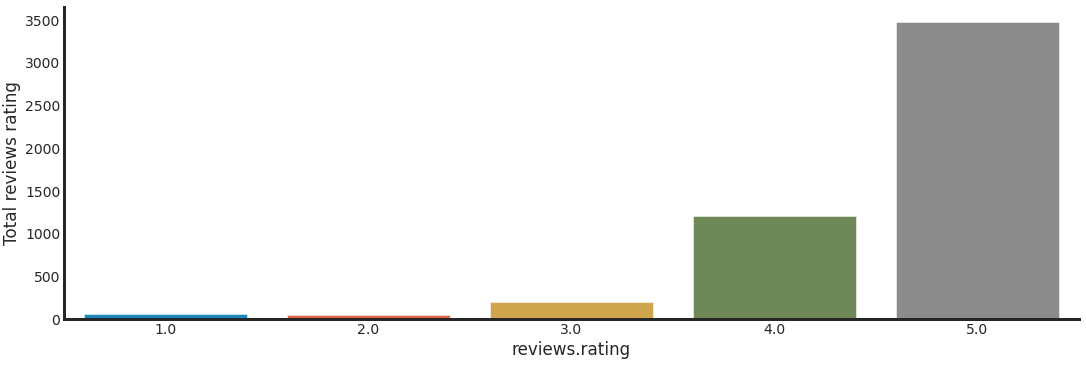

In [47]:
# Check the distribution of the review rating
with sns.axes_style('ticks'):
    g = sns.factorplot('reviews.rating', data=clean_df, aspect=3.0,kind='count')
    g.set_ylabels('Total reviews rating');

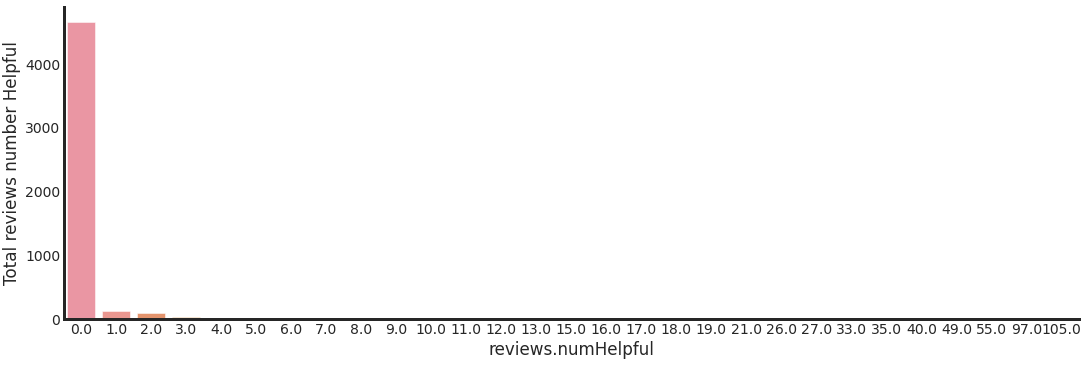

In [48]:
# Check the distribution of the reviews number Helpful
with sns.axes_style('ticks'):
    g = sns.factorplot('reviews.numHelpful', data=clean_df, aspect=3.0,kind='count')
    g.set_ylabels('Total reviews number Helpful');

### Visualization of the Product category 

In [49]:
clean_df['categories'].iplot(kind='hist', bins=100, xTitle='Category', linecolor='gray',
    yTitle='count', title='Product category Count Distribution')

In [50]:
clean_df['reviews.doRecommend'].iplot(kind='hist', bins=70, xTitle='Review Recomended ', linecolor='gray',
    yTitle='count', title='Reviews do Recommend Count Distribution')

### Top Products Sold by Product category, number of reviews and average review

In [51]:
#amz_review = amazon.sort_values('average_review', ascending= False)
#amz_n_review = amazon.sort_values('number_of_reviews', ascending= False)
#amz_product_cat = amazon.sort_values('product_cat', ascending= False)

In [52]:
#initialize interactive graph object

'''fig = go.Figure()

#add each of the graph traces for likes, views and comments
fig.add_trace(
    go.Bar(
        y=amz_review['product_name'].head(10),
        x=amz_review['average_review'].head(10),
        hovertext=amz_review['price'],
        orientation='h',
        name= 'Average review',
        marker=dict(color = 'purple')))

fig.add_trace(
    go.Bar(
        y=amz_product_cat['product_name'].head(10),
        x=amz_product_cat['number_of_reviews'].head(10),
        hovertext=amz_product_cat['price'],
        orientation='h',
        name= 'Number of Reviews',
        visible=False,
        marker=dict(color = 'pink')))

fig.add_trace(
    go.Bar(
        y=amz_n_review['product_name'].head(10),
        x=amz_n_review['product_cat'].head(10),
        hovertext=amz_n_review['price'],
        orientation='h',
        name= 'product category',
        visible= False,
        marker= dict(color ='red')))

#update layout with buttons, corresponding to each trace
fig.update_layout(
    {
    'title' : {
        'font_size' : 20,
        'text' : 'Top 10 Products by Average review, Number of reviews and Product category '}},
    yaxis = {'title' : 'Product name'},
    updatemenus= [dict(
        type='buttons',
        direction='right',
        active=0,
        y=1.1,
        x=0.8,
        buttons=list([
            dict(label='average review rate'
                ,method='update'
                ,args=[{'visible' : [True,False,False]},
                     {'title' : 'Top 10 Trending Products by average review rate',
                     'xaxis': {'title': 'Average review rate'}}]),
            dict(label='Number of Reviews'
                ,method='update'
                ,args=[{'visible' : [False,True,False]},
                    {'title' : 'Top 10 Trending products by number of reviews',
                     'xaxis': {'title': 'product category'}}]),
            dict(label='product category'
                ,method='update'
                ,args=[{'visible' : [False,False,True]},
                {'title' : 'Top 10 Trending Videos by product category',
                'xaxis': {'title': 'Product category'}}])
        ])
        )])
#display figure
fig.show()'''

"fig = go.Figure()\n\n#add each of the graph traces for likes, views and comments\nfig.add_trace(\n    go.Bar(\n        y=amz_review['product_name'].head(10),\n        x=amz_review['average_review'].head(10),\n        hovertext=amz_review['price'],\n        orientation='h',\n        name= 'Average review',\n        marker=dict(color = 'purple')))\n\nfig.add_trace(\n    go.Bar(\n        y=amz_product_cat['product_name'].head(10),\n        x=amz_product_cat['number_of_reviews'].head(10),\n        hovertext=amz_product_cat['price'],\n        orientation='h',\n        name= 'Number of Reviews',\n        visible=False,\n        marker=dict(color = 'pink')))\n\nfig.add_trace(\n    go.Bar(\n        y=amz_n_review['product_name'].head(10),\n        x=amz_n_review['product_cat'].head(10),\n        hovertext=amz_n_review['price'],\n        orientation='h',\n        name= 'product category',\n        visible= False,\n        marker= dict(color ='red')))\n\n#update layout with buttons, correspondi

### Correlation Matrix

In [53]:
for col in clean_df.columns: 
    print(col)

id
dateAdded
dateUpdated
name
asins
brand
categories
primaryCategories
imageURLs
keys
manufacturer
manufacturerNumber
reviews.date
reviews.dateSeen
reviews.doRecommend
reviews.numHelpful
reviews.rating
reviews.sourceURLs
reviews.text
reviews.title
reviews.username
sourceURLs


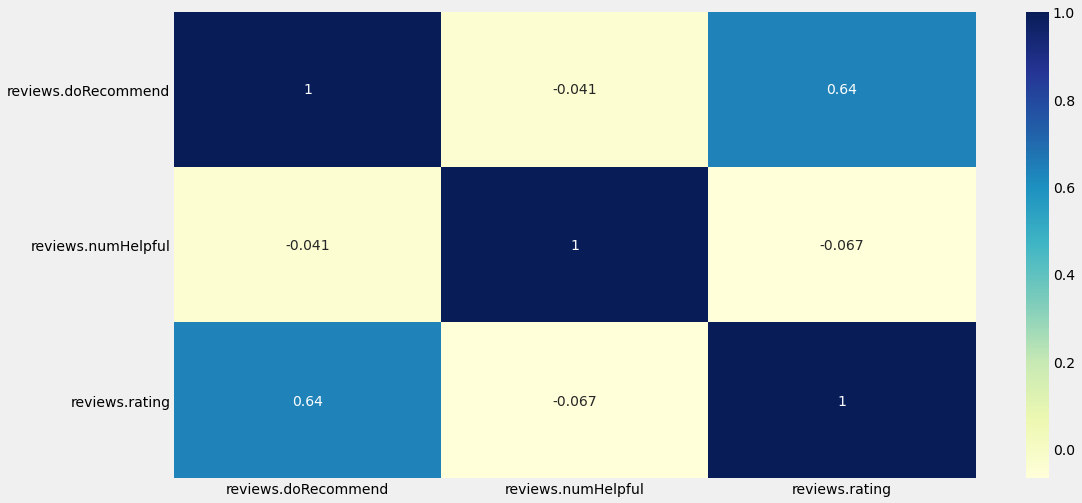

In [54]:
cor = clean_df.corr()

# plotting correlations on a heatmap
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

### Handling NaN values 
Check out for remain Null values

In [55]:
clean_df.isnull().sum()

id                      0
dateAdded               0
dateUpdated             0
name                    0
asins                   0
brand                   0
categories              0
primaryCategories       0
imageURLs               0
keys                    0
manufacturer            0
manufacturerNumber      0
reviews.date            0
reviews.dateSeen        0
reviews.doRecommend     0
reviews.numHelpful      0
reviews.rating          0
reviews.sourceURLs      0
reviews.text            0
reviews.title          13
reviews.username        0
sourceURLs              0
dtype: int64

##  Classifying text as positive, negative or Neutral

### Creating a new column call 'Sentiment'

This column is going to be based in the average review that is in a range of 0.0 to 5.0.
If the score is below 4.0 is going to be Negative, equal 4.0 is consider Neutral andabove 4.0 until 5.0 is Positive sentiment

In [56]:
#Applying the function in our new column
clean_df['sentiment'] = clean_df.apply(define_sentiment, axis=1)
clean_df.head(3)

id                 dateAdded               dateUpdated  \
0  AVqVGZNvQMlgsOJE6eUY 2017-03-03 16:56:05+00:00 2018-10-25 16:36:31+00:00   
1  AVqVGZNvQMlgsOJE6eUY 2017-03-03 16:56:05+00:00 2018-10-25 16:36:31+00:00   
2  AVqVGZNvQMlgsOJE6eUY 2017-03-03 16:56:05+00:00 2018-10-25 16:36:31+00:00   

                                                name       asins   brand  \
0  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
1  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
2  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   

                                          categories primaryCategories  \
0  Computers,Electronics Features,Tablets,Electro...       Electronics   
1  Computers,Electronics Features,Tablets,Electro...       Electronics   
2  Computers,Electronics Features,Tablets,Electro...       Electronics   

                                           imageURLs  \
0  https://pisces.bbystatic.com/image2/BestBuy_US...   
1  https://pisces.bbystatic.com/image2/BestBuy_US...   
2  https://pisces.bbystatic.com/image2/BestBuy_US...   

                                                keys manufacturer  \
0  allnewkindleereaderblack6glarefreetouchscreend...       Amazon   
1  allnewkindleereaderblack6glarefreetouchscreend...       Amazon   
2  allnewkindleereaderblack6glarefreetouchscreend...       Amazon   

  manufacturerNumber              reviews.date  \
0         B00ZV9PXP2 2017-09-03 00:00:00+00:00   
1         B00ZV9PXP2 2017-06-06 00:00:00+00:00   
2         B00ZV9PXP2 2018-04-20 00:00:00+00:00   

                                    reviews.dateSeen  reviews.doRecommend  \
0  2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...                False   
1  2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...                 True   
2                               2018-05-27T00:00:00Z                 True   

   reviews.numHelpful  reviews.rating  \
0                 0.0             3.0   
1                 0.0             5.0   
2                 0.0             4.0   

                                  reviews.sourceURLs  \
0  http://reviews.bestbuy.com/3545/5442403/review...   
1  http://reviews.bestbuy.com/3545/5442403/review...   
2  https://reviews.bestbuy.com/3545/5442403/revie...   

                                        reviews.text  \
0  I thought it would be as big as small paper bu...   
1  This kindle is light and easy to use especiall...   
2  Didnt know how much i'd use a kindle so went f...   

                                  reviews.title reviews.username  \
0                                     Too small           llyyue   
1  Great light reader. Easy to use at the beach           Charmi   
2                           Great for the price     johnnyjojojo   

                                          sourceURLs sentiment  
0  https://www.newegg.com/Product/Product.aspx%25...   Neutral  
1  https://www.newegg.com/Product/Product.aspx%25...  Positive  
2  https://www.newegg.com/Product/Product.aspx%25...  Positive

In [57]:
pd.DataFrame(clean_df.groupby('sentiment')['reviews.rating'].count())

reviews.rating
sentiment                
Negative              117
Neutral               197
Positive             4686

<a id="section-three"></a>
# Story Generation and Visualization from reviews

By go further in the exploratory data analysis on texts we are try to understand what features contributes to the sentiment category.

* Prior analysis assumptions:

* Higher the rate the sentiment becomes positive

* There are be many positive sentiment reviews which lead to bias

* These assumptions will be verified with our plots also we will do text analysis.

### Sentiment vs. Average Review
Look for a relationship between these two variables

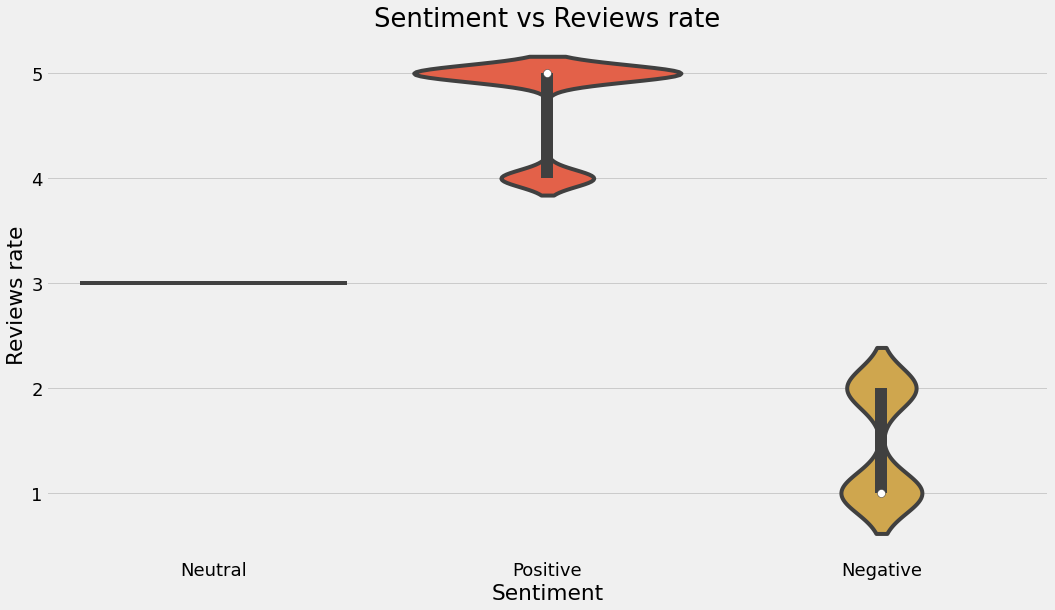

In [58]:
#plot layout
plt.rcParams.update({'font.size': 18})
rcParams['figure.figsize'] = 16,9

#Plotting 
sns.violinplot( x=clean_df['sentiment'], y=clean_df['reviews.rating'])
plt.title('Sentiment vs Reviews rate')
plt.xlabel('Sentiment')
plt.ylabel('Reviews rate')
plt.show()

In [59]:
clean_df['sentiment'].iplot(kind='hist', xTitle='sentiment',
                  yTitle='reviews.rating', title='Sentiment Distribution')

<a id="section-four"></a>
# Text Reviews

### Review Text Ponctuation and  creat stop words


NLKT stop words contains words like not, hasn't,would'nt which actually conveys a negative sentiment. If we remove that it will end up contradicting the target variable(sentiment). So I have curated the stop words which doesn't have any negative sentiment or any negative alternatives.

In [60]:
#Apply the review cleaning function to eliminate number and characters
clean_df['reviews.text'] = clean_df['reviews.text'].apply(lambda x:review_cleaning(x))
clean_df.head(2)

id                 dateAdded               dateUpdated  \
0  AVqVGZNvQMlgsOJE6eUY 2017-03-03 16:56:05+00:00 2018-10-25 16:36:31+00:00   
1  AVqVGZNvQMlgsOJE6eUY 2017-03-03 16:56:05+00:00 2018-10-25 16:36:31+00:00   

                                                name       asins   brand  \
0  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
1  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   

                                          categories primaryCategories  \
0  Computers,Electronics Features,Tablets,Electro...       Electronics   
1  Computers,Electronics Features,Tablets,Electro...       Electronics   

                                           imageURLs  \
0  https://pisces.bbystatic.com/image2/BestBuy_US...   
1  https://pisces.bbystatic.com/image2/BestBuy_US...   

                                                keys manufacturer  \
0  allnewkindleereaderblack6glarefreetouchscreend...       Amazon   
1  allnewkindleereaderblack6glarefreetouchscreend...       Amazon   

  manufacturerNumber              reviews.date  \
0         B00ZV9PXP2 2017-09-03 00:00:00+00:00   
1         B00ZV9PXP2 2017-06-06 00:00:00+00:00   

                                    reviews.dateSeen  reviews.doRecommend  \
0  2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...                False   
1  2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...                 True   

   reviews.numHelpful  reviews.rating  \
0                 0.0             3.0   
1                 0.0             5.0   

                                  reviews.sourceURLs  \
0  http://reviews.bestbuy.com/3545/5442403/review...   
1  http://reviews.bestbuy.com/3545/5442403/review...   

                                        reviews.text  \
0  i thought it would be as big as small paper bu...   
1  this kindle is light and easy to use especiall...   

                                  reviews.title reviews.username  \
0                                     Too small           llyyue   
1  Great light reader. Easy to use at the beach           Charmi   

                                          sourceURLs sentiment  
0  https://www.newegg.com/Product/Product.aspx%25...   Neutral  
1  https://www.newegg.com/Product/Product.aspx%25...  Positive

In [61]:
create_stop_words = ['yourselves', 'between', 'whom', 'itself', 'is', "she's", 'up', 'herself', 'here', 'your', 'each', 
             'we', 'he', 'my', "you've", 'having', 'in', 'both', 'for', 'themselves', 'are', 'them', 'other',
             'and', 'an', 'during', 'their', 'can', 'yourself', 'she', 'until', 'so', 'these', 'ours', 'above', 
             'what', 'while', 'have', 're', 'more', 'only', "needn't", 'when', 'just', 'that', 'were', "don't", 
             'very', 'should', 'any', 'y', 'isn', 'who',  'a', 'they', 'to', 'too', "should've", 'has', 'before',
             'into', 'yours', "it's", 'do', 'against', 'on',  'now', 'her', 've', 'd', 'by', 'am', 'from', 
             'about', 'further', "that'll", "you'd", 'you', 'as', 'how', 'been', 'the', 'or', 'doing', 'such',
             'his', 'himself', 'ourselves',  'was', 'through', 'out', 'below', 'own', 'myself', 'theirs', 
             'me', 'why', 'once',  'him', 'than', 'be', 'most', "you'll", 'same', 'some', 'with', 'few', 'it',
             'at', 'after', 'its', 'which', 'there','our', 'this', 'hers', 'being', 'did', 'of', 'had', 'under',
             'over','again', 'where', 'those', 'then', "you're", 'i', 'because', 'does', 'all']

In [62]:
clean_df['reviews.text'] = clean_df['reviews.text'].apply(lambda x: ' '.join([word for word in x.split() if word not in 
                                                                                  (create_stop_words)]))

### Creating additional features for text analysis

Create **polarity, review length and word count**

* Polarity: By using Textblob for figuring out the rate of sentiment between [-1,1] where -1 is negative and 1 is positive

* Review length: length of the review which includes each letters and spaces

* Word length: It measures how many words are in the customer review column

In [63]:
clean_df['polarity'] = clean_df['reviews.text'].map(lambda x: TextBlob(x).sentiment.polarity)
clean_df['review_len'] = clean_df['reviews.text'].astype(str).apply(len)
clean_df['word_count'] = clean_df['reviews.text'].apply(lambda x: len(str(x).split()))

In [64]:
clean_df.head(3)

id                 dateAdded               dateUpdated  \
0  AVqVGZNvQMlgsOJE6eUY 2017-03-03 16:56:05+00:00 2018-10-25 16:36:31+00:00   
1  AVqVGZNvQMlgsOJE6eUY 2017-03-03 16:56:05+00:00 2018-10-25 16:36:31+00:00   
2  AVqVGZNvQMlgsOJE6eUY 2017-03-03 16:56:05+00:00 2018-10-25 16:36:31+00:00   

                                                name       asins   brand  \
0  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
1  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   
2  Amazon Kindle E-Reader 6" Wifi (8th Generation...  B00ZV9PXP2  Amazon   

                                          categories primaryCategories  \
0  Computers,Electronics Features,Tablets,Electro...       Electronics   
1  Computers,Electronics Features,Tablets,Electro...       Electronics   
2  Computers,Electronics Features,Tablets,Electro...       Electronics   

                                           imageURLs  \
0  https://pisces.bbystatic.com/image2/BestBuy_US...   
1  https://pisces.bbystatic.com/image2/BestBuy_US...   
2  https://pisces.bbystatic.com/image2/BestBuy_US...   

                                                keys manufacturer  \
0  allnewkindleereaderblack6glarefreetouchscreend...       Amazon   
1  allnewkindleereaderblack6glarefreetouchscreend...       Amazon   
2  allnewkindleereaderblack6glarefreetouchscreend...       Amazon   

  manufacturerNumber              reviews.date  \
0         B00ZV9PXP2 2017-09-03 00:00:00+00:00   
1         B00ZV9PXP2 2017-06-06 00:00:00+00:00   
2         B00ZV9PXP2 2018-04-20 00:00:00+00:00   

                                    reviews.dateSeen  reviews.doRecommend  \
0  2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...                False   
1  2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...                 True   
2                               2018-05-27T00:00:00Z                 True   

   reviews.numHelpful  reviews.rating  \
0                 0.0             3.0   
1                 0.0             5.0   
2                 0.0             4.0   

                                  reviews.sourceURLs  \
0  http://reviews.bestbuy.com/3545/5442403/review...   
1  http://reviews.bestbuy.com/3545/5442403/review...   
2  https://reviews.bestbuy.com/3545/5442403/revie...   

                                        reviews.text  \
0  thought would big small paper but turn like pa...   
1             kindle light easy use especially beach   
2  didnt know much id use kindle went lower end i...   

                                  reviews.title reviews.username  \
0                                     Too small           llyyue   
1  Great light reader. Easy to use at the beach           Charmi   
2                           Great for the price     johnnyjojojo   

                                          sourceURLs sentiment  polarity  \
0  https://www.newegg.com/Product/Product.aspx%25...   Neutral -0.116667   
1  https://www.newegg.com/Product/Product.aspx%25...  Positive  0.277778   
2  https://www.newegg.com/Product/Product.aspx%25...  Positive  0.165625   

   review_len  word_count  
0         142          21  
1          38           6  
2          73          15

### Understanding the Sentiment polarity distribution

In [65]:
clean_df['polarity'].iplot(kind='hist', bins=50, xTitle='polarity', linecolor='gray',
    yTitle='count', title='Sentiment Polarity Distribution')

In [66]:
clean_df['reviews.rating'].iplot(kind='hist', xTitle='rating', linecolor='gray',
    yTitle='count',title='Review Rating Distribution')

### Review Text Length Distribution

In [67]:
clean_df['review_len'].iplot(kind='hist', bins=50, xTitle='Review length', linecolor='gray',
    yTitle='count', title='Review Text Length Distribution')

In [68]:
clean_df['word_count'].iplot(kind='hist', bins=50, xTitle='word count', linecolor='gray',
    yTitle='count', title='Review Text Word Count Distribution')

## N-gram analysis

*Using ngrams to analyse the text, based on it's sentiment *

In [69]:
#Creating a copy of the dataset
amazon_clean = clean_df.copy()

In [70]:
positive_rev = amazon_clean[amazon_clean['sentiment']=='Positive'].dropna()
neutral_rev= amazon_clean[amazon_clean['sentiment']=='Neutral'].dropna()
negative_rev = amazon_clean[amazon_clean['sentiment']=='Negative'].dropna()

In [71]:
positive_rev.shape

(4673, 26)

In [72]:
neutral_rev.shape

(197, 26)

In [73]:
negative_rev.shape

(117, 26)

### Bigram analysis

**We had to opt for plot only Positive and Neutral sentiment as there is no Negative row with sentiment to work on it, so we will plot most frequent two words in reviews based on sentiments**

In [80]:
from collections import defaultdict

## Create bar chart from positive reviews 
freq_dict = defaultdict(int)
for sent in positive_rev['reviews.text']:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
df_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
df_sorted.columns = ['word', 'wordcount']
trace0 = horizontal_bar_chart(df_sorted.head(15), 'green')

## Create bar chart from neutral reviews
freq_dict = defaultdict(int)
for sent in neutral_rev['reviews.text']:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
df_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
df_sorted.columns = ['word', 'wordcount']
trace1 = horizontal_bar_chart(df_sorted.head(15), 'orange')

## Create bar chart from negative reviews
freq_dict = defaultdict(int)
for sent in negative_rev['reviews.text']:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
df_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
df_sorted.columns = ['word', 'wordcount']
trace2 = horizontal_bar_chart(df_sorted.head(15), 'blue')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                          subplot_titles=['Bigram plots of Positive reviews', 'Bigram plots of Neutral reviews',
                                         'Bigram plots of Negative reviews'])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)

fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title='Bigram Plots')
iplot(fig, filename='word-plots')

### Wordcloud Positive reviews

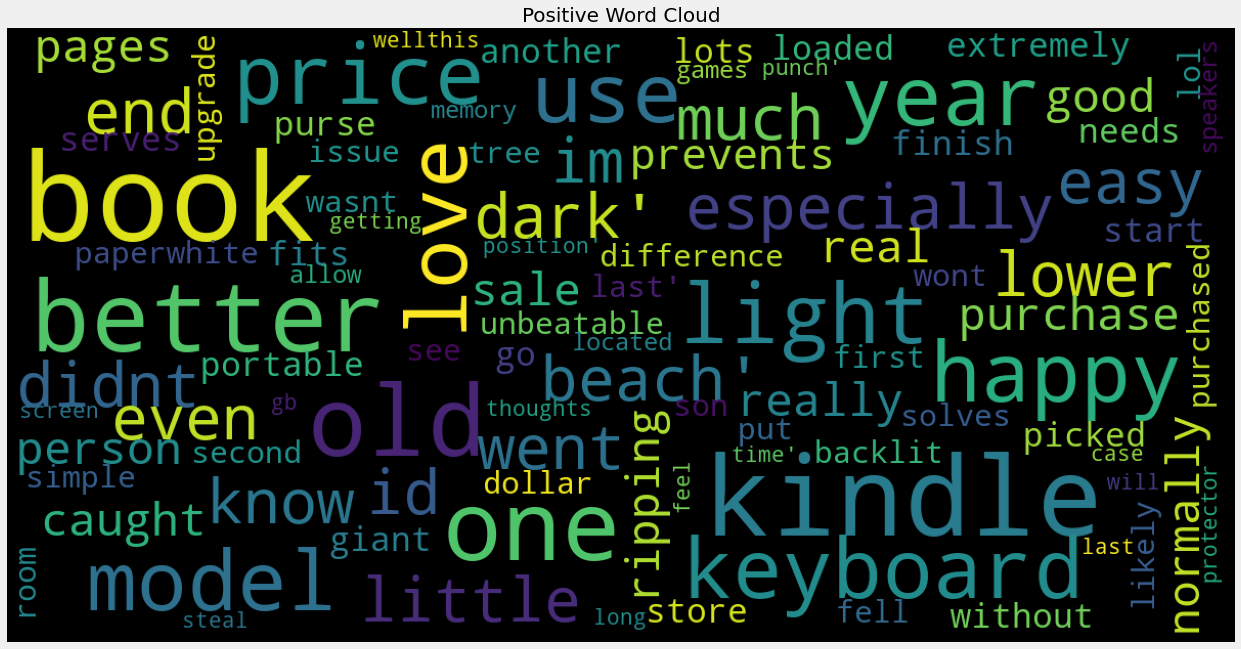

In [85]:
txt = positive_rev['reviews.text'].values
wordcloud = WordCloud(background_color = 'black', max_words=200,
     max_font_size=40,random_state=4692, scale=3, stopwords = STOPWORDS).generate(str(txt))
                
plt.figure(figsize=(28,22))
ax4 = plt.subplot2grid((4, 2), (2, 0), colspan=2,rowspan=2)
ax4.set_title('Positive Word Cloud',fontsize=20)
ax4.imshow(wordcloud)
ax4.axis('off')
plt.show()

### Wordcloud Neutral Reviews

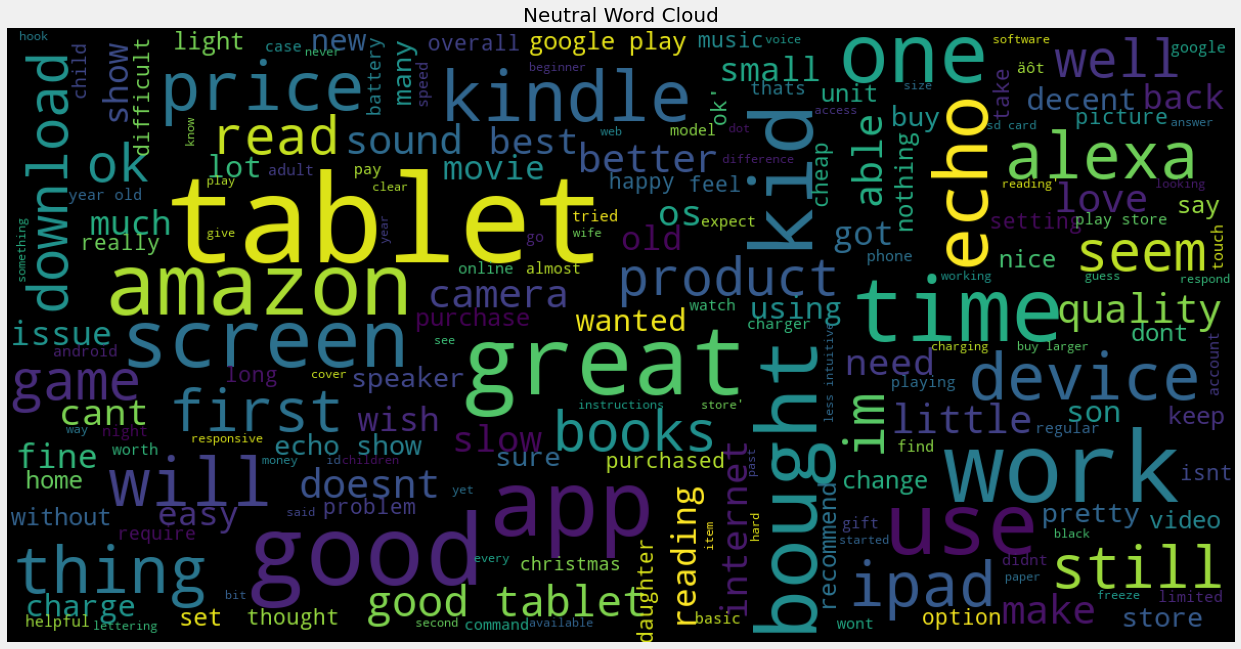

In [86]:
txt = neutral_rev['reviews.text'].values
wordcloud = WordCloud(background_color = 'black', max_words=200,
     max_font_size=40,random_state=4692, scale=3, stopwords = STOPWORDS).generate(str(txt))

plt.figure(figsize=(28,22))
ax4 = plt.subplot2grid((4, 2), (2, 0), colspan=2,rowspan=2)
ax4.set_title('Neutral Word Cloud',fontsize=20)
ax4.imshow(wordcloud)
ax4.axis('off')
plt.show()

## Wordcloud Negative Reviews

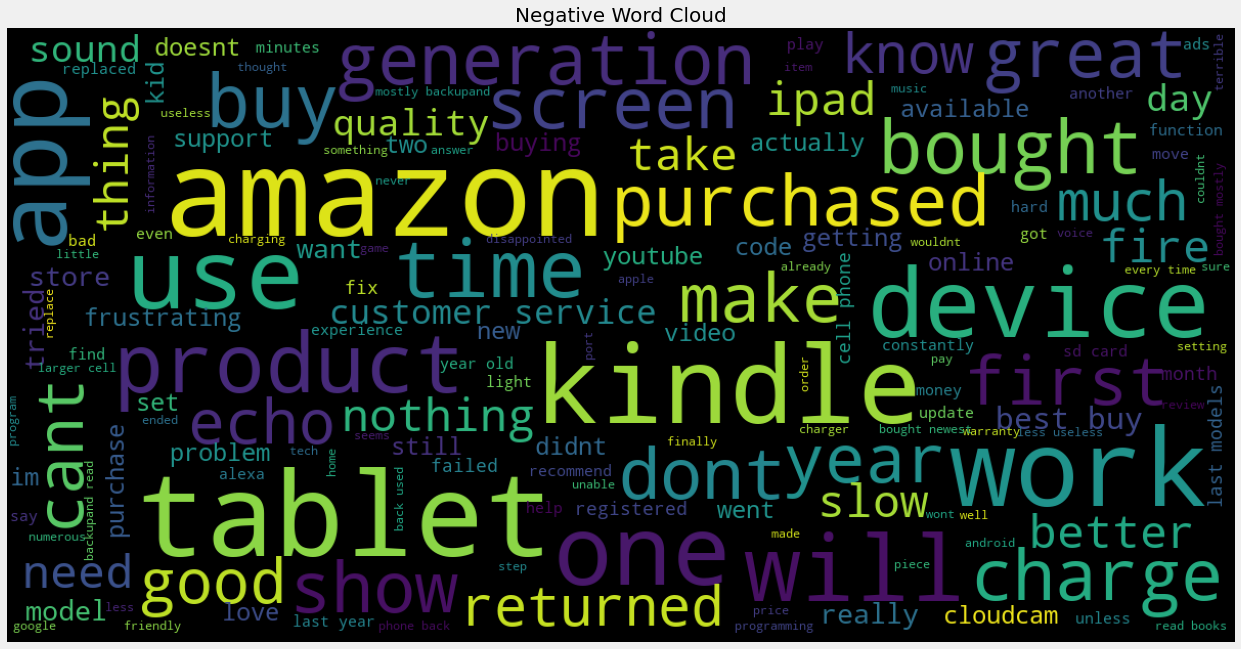

In [88]:
txt = negative_rev['reviews.text'].values
wordcloud = WordCloud(background_color = 'black', max_words=200,
     max_font_size=40,random_state=4692, scale=3, stopwords = STOPWORDS).generate(str(txt))

plt.figure(figsize=(28,22))
ax4 = plt.subplot2grid((4, 2), (2, 0), colspan=2,rowspan=2)
ax4.set_title('Negative Word Cloud',fontsize=20)
ax4.imshow(wordcloud)
ax4.axis('off')
plt.show()

<a id="section-five"></a>
# Extracting Features from Cleaned reviews

Before we build the model for our sentiment analysis, it is required to convert the review texts into vector formation as computer cannot understand words and their sentiment. In this project, we are going to use TF-TDF method to convert the texts

### Encoding target variable-sentiment
Let's encode our target variable with Label encoder.

In [89]:
# calling the label encoder function
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'sentiment'. 
amazon_clean['sentiment']= label_encoder.fit_transform(amazon_clean['sentiment']) 
  
amazon_clean['sentiment'].unique() 

array([1, 2, 0])

In [90]:
amazon_clean['sentiment'].value_counts()

2    4686
1     197
0     117
Name: sentiment, dtype: int64

### Stemming the reviews
Stemming is a method of deriving root word from the inflected word. Here we extract the customer reviews and convert the words to its root word.

There is another technique knows as **Lemmatization** where it converts the words into root words which has a semantic meaning.

In [92]:
#Extracting 'reviews' for processing
review_features=amazon_clean.copy()
review_features=review_features[['reviews.text']].reset_index(drop=True)
review_features.head()

reviews.text
0  thought would big small paper but turn like pa...
1             kindle light easy use especially beach
2  didnt know much id use kindle went lower end i...
3  happy purchase caught sale really good price n...
4  solid entry level kindle great kids gifted kid...

In [93]:
#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(review_features)):
    review = re.sub('[^a-zA-Z]', ' ', review_features['reviews.text'][i])
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in create_stop_words]
    review = ' '.join(review)
    corpus.append(review)   

After apply the stemmed words, the text will look like this.

In [94]:
corpus[25]

'love simplic also love use read cant download distract app'

## TFIDF(Term Frequency — Inverse Document Frequency)
This is a technique to quantify a word in documents, we generally compute a weight to each word which signifies the importance of the word in the document and corpus. This method is a widely used technique in Information Retrieval and Text Mining.

Here we are splitting as ngram_range (1,2) which means unigrams and bigrams and consider their combined weight.Also we are taking only the top 5000 words from the customer reviews.


In [95]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000,ngram_range=(1,2))
# TF-IDF feature matrix
X= tfidf_vectorizer.fit_transform(review_features['reviews.text'])

### Define Target Variable

In [96]:
y = amazon_clean['sentiment']

### Handling Imbalance target using feature-SMOTE

We noticed that we got a lot of positive sentiments compared to negative and neutral. So it is crucial to balanced the classes in such situation. 
SMOTE(Synthetic Minority Oversampling Technique)is used to balance out the imbalanced dataset problem.
It aims to balance class distribution by randomly increasing minority class examples by replicating them.

In [97]:
print(f'Original dataset shape : {Counter(y)}')

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print(f'Resampled dataset shape {Counter(y_res)}')

Original dataset shape : Counter({2: 4686, 1: 197, 0: 117})
Resampled dataset shape Counter({1: 4686, 2: 4686, 0: 4686})


### Split the dataset 70:30 train and test respectivelly

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size= 0.2, random_state=7925)

<a id="section-six"></a>
# Model Building: Sentiment Analysis

Perform model selection to find the best model using cross validation.

In [99]:
from sklearn.ensemble import RandomForestClassifier

logreg_cv = LogisticRegression(random_state=7925)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
rfc = RandomForestClassifier()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes', 5: 'Random Forest Classifier'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv, rfc]


for i,model in enumerate(cv_models):
    print('{} Test Accuracy: {:.2f}'.format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

Logistic Regression Test Accuracy: 0.94
Decision Tree Test Accuracy: 0.92
KNN Test Accuracy: 0.94
SVC Test Accuracy: 0.95
Naive Bayes Test Accuracy: 0.91
Random Forest Classifier Test Accuracy: 0.95


From the results, we can see that Logistic Regression and SVC algorithms present accuracies around 89%. That's great.

So let's implement in logistic regression and SVC the hyperparameter tuning.

## LOGISTIC REGRESSION

In [105]:
param_grid = {'C': np.logspace(-1, 1, 20),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=7925), param_grid,cv=10, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print('The mean Test accuracy of the model is:',best_model.score(X_test,y_test))

LogisticRegression(C=7.847599703514611, random_state=7925)
The mean Test accuracy of the model is: 0.9914651493598862


In [107]:
logreg = LogisticRegression(C=7.8, random_state=7925)
logreg.fit(X_train, y_train)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on train set: 1.00


In [108]:
y_pred = logreg.predict(X_test)
print('Classification Report:\n',classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       930
           1       0.98      1.00      0.99       912
           2       1.00      0.98      0.99       970

    accuracy                           0.99      2812
   macro avg       0.99      0.99      0.99      2812
weighted avg       0.99      0.99      0.99      2812



## Classification metrics
**Here we plot the confusion matrix with ROC and check our f1 score**

Confusion matrix, without normalization


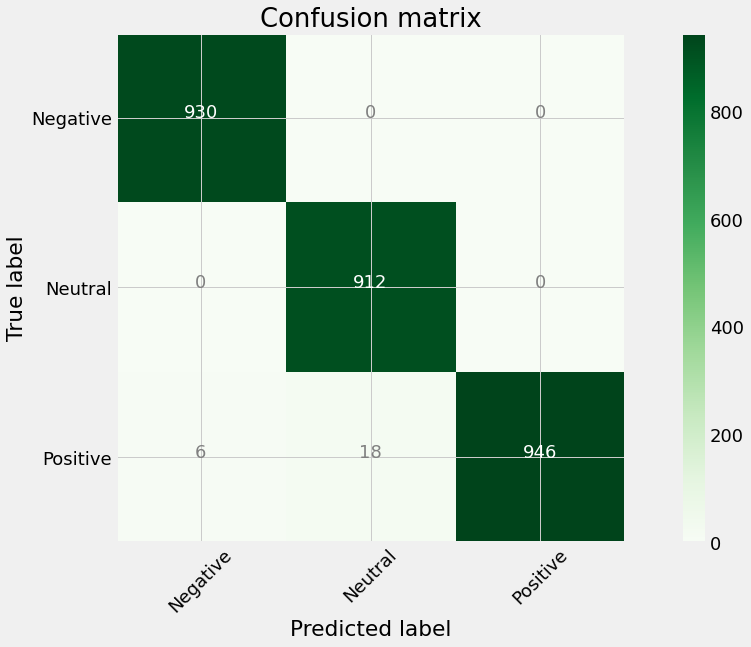

In [109]:
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, normalize=False, classes=['Negative','Neutral','Positive'])

In [110]:
y_train.shape

(11246,)

In [111]:
X_train.shape

(11246, 5000)

## RANDOM FOREST CLASSIFIER

In [112]:
parameters = [ {'n_estimators':[5,10,15,20,25,30,35], 'criterion':['entropy', 'gini'],
                'max_depth':[1,2,3,4,5,6,7,8,9,10,11],'max_features':['sqrt','log2'],'random_state':[67235]}]
grid_search_c = GridSearchCV(RandomForestClassifier(), parameters, scoring = 'accuracy')
grid_search_c.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                          'max_features': ['sqrt', 'log2'],
                          'n_estimators': [5, 10, 15, 20, 25, 30, 35],
                          'random_state': [67235]}],
             scoring='accuracy')

In [113]:
grid_search_c.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='sqrt',
                       n_estimators=35, random_state=67235)

In [114]:
grid_search_c.best_score_

0.9012093868879996

### Hyperparameter Tuning

In [116]:
rfc=RandomForestClassifier(n_estimators=35, criterion='entropy', max_depth=11, max_features='sqrt', random_state=62375)
rfc.fit(X_train,y_train)
rfc.score(X_train, y_train)

0.8994309087675618

In [117]:
y_pred = rfc.predict(X_test)
print (classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93       930
           1       0.89      0.88      0.88       912
           2       0.81      0.92      0.86       970

    accuracy                           0.89      2812
   macro avg       0.90      0.89      0.89      2812
weighted avg       0.90      0.89      0.89      2812



### Confusion Matrix

Confusion matrix, without normalization


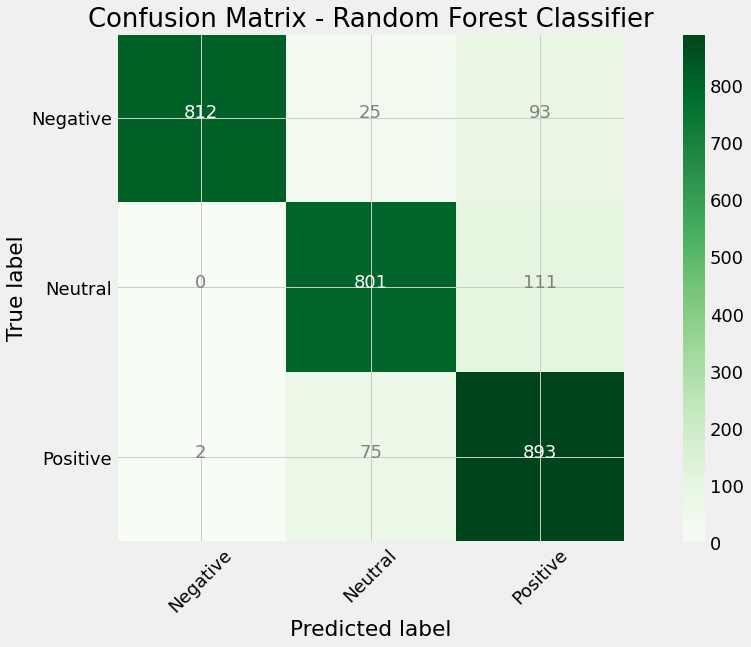

In [118]:
cm_rfc =  metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm_rfc, normalize = False, classes=['Negative','Neutral','Positive'],
                      title  = 'Confusion Matrix - Random Forest Classifier')

### Confusion Matrix

#Binarizing the target feature
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

#Train-Test split(70:30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,
                                                    random_state=7925)

#OneVsRestClassifier
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=7925))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

#Computing TPR and FPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#Compute micro-average ROC curve and ROC area
fpr['micro'], tpr['micro'], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc['micro'] = auc(fpr['micro'], tpr['micro'])
    
#aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

#interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

#Finally average it and compute AUC
mean_tpr /= n_classes

fpr['macro'] = all_fpr
tpr['macro'] = mean_tpr
roc_auc['macro'] = auc(fpr['macro'], tpr['macro'])

#Plot all ROC curves
plt.figure()
plt.plot(fpr['micro'], tpr['micro'],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc['micro']),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr['macro'], tpr['macro'],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc['macro']),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=4,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic to multi-class')
plt.legend(loc='lower right')

cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Negative','Neutral','Positive'])
plt.show()

In [125]:
def confusion_matrix(model, X_test, y_test):

    fig, ax = plt.subplots(figsize=(8,8))

    plot_confusion_matrix(model, X_test, y_test,normalize=True cmap='Oranges')

    ax.set_title('Confusion matrix\n(Normalized values)', fontsize=16, fontweight='bold')
    ax.set_xlabel('Predicted label', fontsize=18)
    ax.set_ylabel('True label', fontsize=18)
  
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_teste, y_pred)
  
    print(f'Accuracy = {acc:.3f}')

SyntaxError: invalid syntax (<ipython-input-125-31be6da4818f>, line 5)

<a id="section-B"></a>
#  Walmart Dataset

## Import Libraries

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
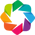

In [126]:
#Apriori libraries 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#Visualization libraries
import altair as alt
import holoviews as hv
from holoviews import opts
hv.extension('bokeh')

In [127]:
walmart = pd.read_csv('walmart_product_data_2.csv')
walmart.head(3)

Uniq Id            Crawl Timestamp  \
0  3ec888b73a1a3d2f15fc73fc8d523e4b  2020-04-18 01:57:55 +0000   
1  21582ee76a2b4f8e4b563173c776a3d7  2020-05-19 06:56:11 +0000   
2  3620c6b47eaaf4ba8bf6a3fd2466c14c  2020-06-28 03:31:52 +0000   

                                             Pageurl      Website  \
0  https://www.walmart.com/ip/BLU-G9-G0130WW-64GB...  walmart.com   
1  https://www.walmart.com/ip/ABLEGRID-12V-AC-DC-...  walmart.com   
2  https://www.walmart.com/ip/EcoXGear-EcoDrop-Bl...  walmart.com   

                                               Title  Num Of Reviews  \
0                                                NaN             7.0   
1  ABLEGRID 12V AC/DC Adapter For CCTV Security C...             NaN   
2  EcoXGear EcoDrop Hot Purple 2.4" x 2.4" Waterp...             NaN   

   Average Rating  Number Of Ratings Model Num        Sku           Upc  \
0             5.0                5.0       NaN  409487459           NaN   
1             0.0                0.0       NaN  847081244  6.502345e+11   
2             0.0                0.0       NaN  228973139  8.191270e+11   

    Manufacturer Model Name   Price  Monthly Price Carrier Color Category  \
0            NaN        NaN  169.99            NaN     NaN          Black   
1       Ablegrid        NaN   14.99            NaN     NaN            NaN   
2  Grace Digital        NaN   19.99            NaN     NaN     Hot Purple   

  Internal Memory Screen Size  Five Star  Four Star  Three Star  Two Star  \
0             NaN         NaN        7.0        0.0         0.0       0.0   
1             NaN         NaN        NaN        NaN         NaN       NaN   
2             NaN         NaN        NaN        NaN         NaN       NaN   

   One Star  
0       0.0  
1       NaN  
2       NaN

In [128]:
walmart.describe()

Num Of Reviews  Average Rating  Number Of Ratings           Upc  \
count     2451.000000     4916.000000        5000.000000  1.389000e+03   
mean       137.104447        1.966375           1.930356  5.938884e+11   
std        823.396440        2.112161           2.110755  2.646575e+11   
min          1.000000        0.000000           0.000000  1.070976e+10   
25%          2.000000        0.000000           0.000000  6.021689e+11   
50%          8.000000        0.000000           0.000000  7.009557e+11   
75%         44.000000        4.300000           4.300000  7.699371e+11   
max      26125.000000        5.000000           5.000000  9.999900e+11   

              Price  Monthly Price     Five Star    Four Star   Three Star  \
count   4980.000000            0.0   2439.000000  2440.000000  2439.000000   
mean     126.832321            NaN     97.919639    22.011885     6.621566   
std      428.541478            NaN    625.769894   156.556228    40.239672   
min        0.980000            NaN      0.000000     0.000000     0.000000   
25%       14.402500            NaN      1.000000     0.000000     0.000000   
50%       28.110000            NaN      5.000000     1.000000     0.000000   
75%       92.005000            NaN     28.000000     6.000000     3.000000   
max    10269.000000            NaN  21202.000000  4473.000000  1088.000000   

          Two Star     One Star  
count  2434.000000  2434.000000  
mean      3.332375     6.755136  
std      14.546496    22.506793  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     1.000000  
75%       2.000000     4.000000  
max     401.000000   454.000000

In [129]:
walmart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Uniq Id            5000 non-null   object 
 1   Crawl Timestamp    5000 non-null   object 
 2   Pageurl            5000 non-null   object 
 3   Website            5000 non-null   object 
 4   Title              1561 non-null   object 
 5   Num Of Reviews     2451 non-null   float64
 6   Average Rating     4916 non-null   float64
 7   Number Of Ratings  5000 non-null   float64
 8   Model Num          560 non-null    object 
 9   Sku                5000 non-null   object 
 10  Upc                1389 non-null   float64
 11  Manufacturer       1547 non-null   object 
 12  Model Name         560 non-null    object 
 13  Price              4980 non-null   float64
 14  Monthly Price      0 non-null      float64
 15  Carrier            81 non-null     object 
 16  Color Category     2583 

In [130]:
walmart.isnull().sum()

Uniq Id                 0
Crawl Timestamp         0
Pageurl                 0
Website                 0
Title                3439
Num Of Reviews       2549
Average Rating         84
Number Of Ratings       0
Model Num            4440
Sku                     0
Upc                  3611
Manufacturer         3453
Model Name           4440
Price                  20
Monthly Price        5000
Carrier              4919
Color Category       2417
Internal Memory      4947
Screen Size          4863
Five Star            2561
Four Star            2560
Three Star           2561
Two Star             2566
One Star             2566
dtype: int64

In [131]:
walmart.shape

(5000, 24)

In [132]:
walmart['Crawl Timestamp'].unique()

array(['2020-04-18 01:57:55 +0000', '2020-05-19 06:56:11 +0000',
       '2020-06-28 03:31:52 +0000', ..., '2020-05-25 11:09:10 +0000',
       '2020-06-28 01:21:47 +0000', '2020-04-11 02:21:00 +0000'],
      dtype=object)

In [135]:
#Convert the 'Date' column to datetime format
walmart['Crawl Timestamp']= pd.to_datetime(walmart['Crawl Timestamp'])
 
#Extracting year,month and day
#walmart['year'] = walmart['Crawl Timestamp'].apply(lambda x : x.year)
#walmart['month'] = walmart['Crawl Timestamp'].apply(lambda x : x.month)
#walmart['day'] = walmart['Crawl Timestamp'].apply(lambda x : x.day)
#walmart['weekday'] = walmart['Crawl Timestamp'].apply(lambda x : x.weekday())
walmart.tail(10)

Uniq Id           Crawl Timestamp  \
4990  573343530e2493d6d9ca55eb0506e808 2020-05-20 00:30:48+00:00   
4991  8b244cc9ca3bab22ff8bc1c3d21bf940 2020-04-27 01:56:16+00:00   
4992  cc441ec3e2ccf2fedc17ff5ff01840d6 2020-04-11 01:22:15+00:00   
4993  01b721b9006e0668a8824dae1cf8f580 2020-05-31 01:59:20+00:00   
4994  624dc14dc647e202fe0fe799da007208 2020-04-15 00:47:00+00:00   
4995  8a658cd75db04c44f79583734ef1e5de 2020-04-13 01:01:31+00:00   
4996  eb708365534b47cfd954968c19885882 2020-06-30 09:17:37+00:00   
4997  1921e7d29231310fbe7155abec0d32a0 2020-05-25 11:09:10+00:00   
4998  a86ebdbbf1b61d39bf770870c860f5c0 2020-06-28 01:21:47+00:00   
4999  d1539b9265628251e0141317146088bc 2020-04-11 02:21:00+00:00   

                                                Pageurl      Website  \
4990  https://www.walmart.com/ip/Case-Galaxy-Inch-Ca...  walmart.com   
4991  https://www.walmart.com/ip/Heart-Tracker-Bluet...  walmart.com   
4992  https://www.walmart.com/ip/Safavieh-Hudson-Ami...  walmart.com   
4993  https://www.walmart.com/ip/Wireless-Case-Reduc...  walmart.com   
4994  https://www.walmart.com/ip/Safavieh-Nantucket-...  walmart.com   
4995  https://www.walmart.com/ip/Caron-One-Pound-Yar...  walmart.com   
4996  https://www.walmart.com/ip/Pack-of-5-Free-2-da...  walmart.com   
4997  https://www.walmart.com/ip/Case-F-Screen-G-Gpa...  walmart.com   
4998  https://www.walmart.com/ip/Refurbished-Apple-i...  walmart.com   
4999  https://www.walmart.com/ip/Wrangler-Men-s-Brai...  walmart.com   

                                                  Title  Num Of Reviews  \
4990                                                NaN             1.0   
4991                                                NaN             NaN   
4992                                                NaN           147.0   
4993                                                NaN             1.0   
4994                                                NaN             NaN   
4995                                                NaN           108.0   
4996  Pack of 5 Free 2-day FedEx Washable, Adjustabl...             3.0   
4997                                                NaN             1.0   
4998  Refurbished Apple iPhone 8 256GB, Black - Unlo...             NaN   
4999                                                NaN            83.0   

      Average Rating  Number Of Ratings       Model Num        Sku  \
4990             5.0                5.0             NaN  328520443   
4991             0.0                0.0             NaN  978963527   
4992             4.8                4.8             NaN  452938509   
4993             1.0                1.0             NaN  601824668   
4994             0.0                0.0             NaN   46814849   
4995             4.7                4.7             NaN   37729748   
4996             5.0                5.0             NaN  686096790   
4997             1.0                1.0             NaN  112774496   
4998             0.0                0.0  IPH8 256GB SPG  991947493   
4999             4.2                4.2             NaN  827165108   

               Upc Manufacturer      Model Name   Price  Monthly Price  \
4990           NaN          NaN             NaN   17.99            NaN   
4991           NaN          NaN             NaN   29.99            NaN   
4992           NaN          NaN             NaN   41.98            NaN   
4993           NaN          NaN             NaN   14.97            NaN   
4994           NaN          NaN             NaN  175.99            NaN   
4995           NaN          NaN             NaN   10.05            NaN   
4996  6.895853e+11     Airquilo             NaN   49.99            NaN   
4997           NaN          NaN             NaN    7.66            NaN   
4998  6.893537e+11        Apple  IPH8 256GB SPG  284.99            NaN   
4999           NaN          NaN             NaN   14.00            NaN   

       Carrier Color Category Internal Memory Screen Size  Five Star  \
4990 

In [137]:
clean_df = walmart.copy()
#display how many nulls are in each column
px.bar(clean_df.isnull().sum()
       ,title='Nulls Per Column'
       ,color=clean_df.isnull().sum().index)